In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../dataset/dataset_train.csv")
data.drop(columns=["Arithmancy", "Care of Magical Creatures", "Defense Against the Dark Arts"], inplace=True)
data

Index Hogwarts House First Name    Last Name    Birthday Best Hand  \
0         0      Ravenclaw     Tamara          Hsu  2000-03-30      Left   
1         1      Slytherin      Erich      Paredes  1999-10-14     Right   
2         2      Ravenclaw   Stephany        Braun  1999-11-03      Left   
3         3     Gryffindor      Vesta    Mcmichael  2000-08-19      Left   
4         4     Gryffindor     Gaston        Gibbs  1998-09-27      Left   
...     ...            ...        ...          ...         ...       ...   
1595   1595     Gryffindor       Jung        Blank  2001-09-14     Right   
1596   1596      Slytherin     Shelli         Lock  1998-03-12      Left   
1597   1597     Gryffindor   Benjamin  Christensen  1999-10-24     Right   
1598   1598     Hufflepuff  Charlotte       Dillon  2001-09-21      Left   
1599   1599     Hufflepuff      Kylie        Nowak  2000-08-21      Left   

       Astronomy  Herbology  Divination  Muggle Studies  Ancient Runes  \
0    -487.886086   5.727180       4.722      272.035831     532.484226   
1    -552.060507  -5.987446      -5.612     -487.340557     367.760303   
2    -366.076117   7.725017       6.140      664.893521     602.585284   
3     697.742809  -6.497214       4.026     -537.001128     523.982133   
4     436.775204  -7.820623       2.236     -444.262537     599.324514   
...          ...        ...         ...             ...            ...   
1595  354.280086  -4.541837       5.702     -497.235066     618.220213   
1596  367.531174   6.061064       1.757     -643.271092     445.827565   
1597  544.018925  -3.203269       6.065     -385.150457     635.211486   
1598  453.676219   3.442831       6.738     -831.741123     383.444937   
1599  688.911989   5.421046       6.593     -234.207911     339.775154   

      History of Magic  Transfiguration   Potions     Charms  Flying  
0             5.231058      1039.788281  3.790369 -232.79405  -26.89  
1             4.107170      1058.944592  7.248742 -252.18425 -113.45  
2             3.555579      1088.088348  8.728531 -227.34265   30.42  
3            -4.809637       920.391449  0.821911 -256.84675  200.64  
4            -3.444377       937.434724  4.311066 -256.38730  157.98  
...                ...              ...       ...        ...     ...  
1595         -5.231721       964.219853  3.389086 -250.39401  185.83  
1596          2.238112      1056.147366  5.825263 -246.42719   44.80  
1597         -5.984257       953.866685  1.709808 -251.63679  198.47  
1598          3.813111      1087.949205  3.904100 -246.19072  -76.81  
1599          7.208415      1034.928004  2.052215 -244.02063  -54.77  

[1600 rows x 16 columns]

In [120]:
houses = list(set(data["Hogwarts House"]))
courses = data.columns[6:]

print(houses)
print(courses, len(courses))

['Ravenclaw', 'Hufflepuff', 'Gryffindor', 'Slytherin']
Index(['Astronomy', 'Herbology', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Charms', 'Flying'],
      dtype='object') 10


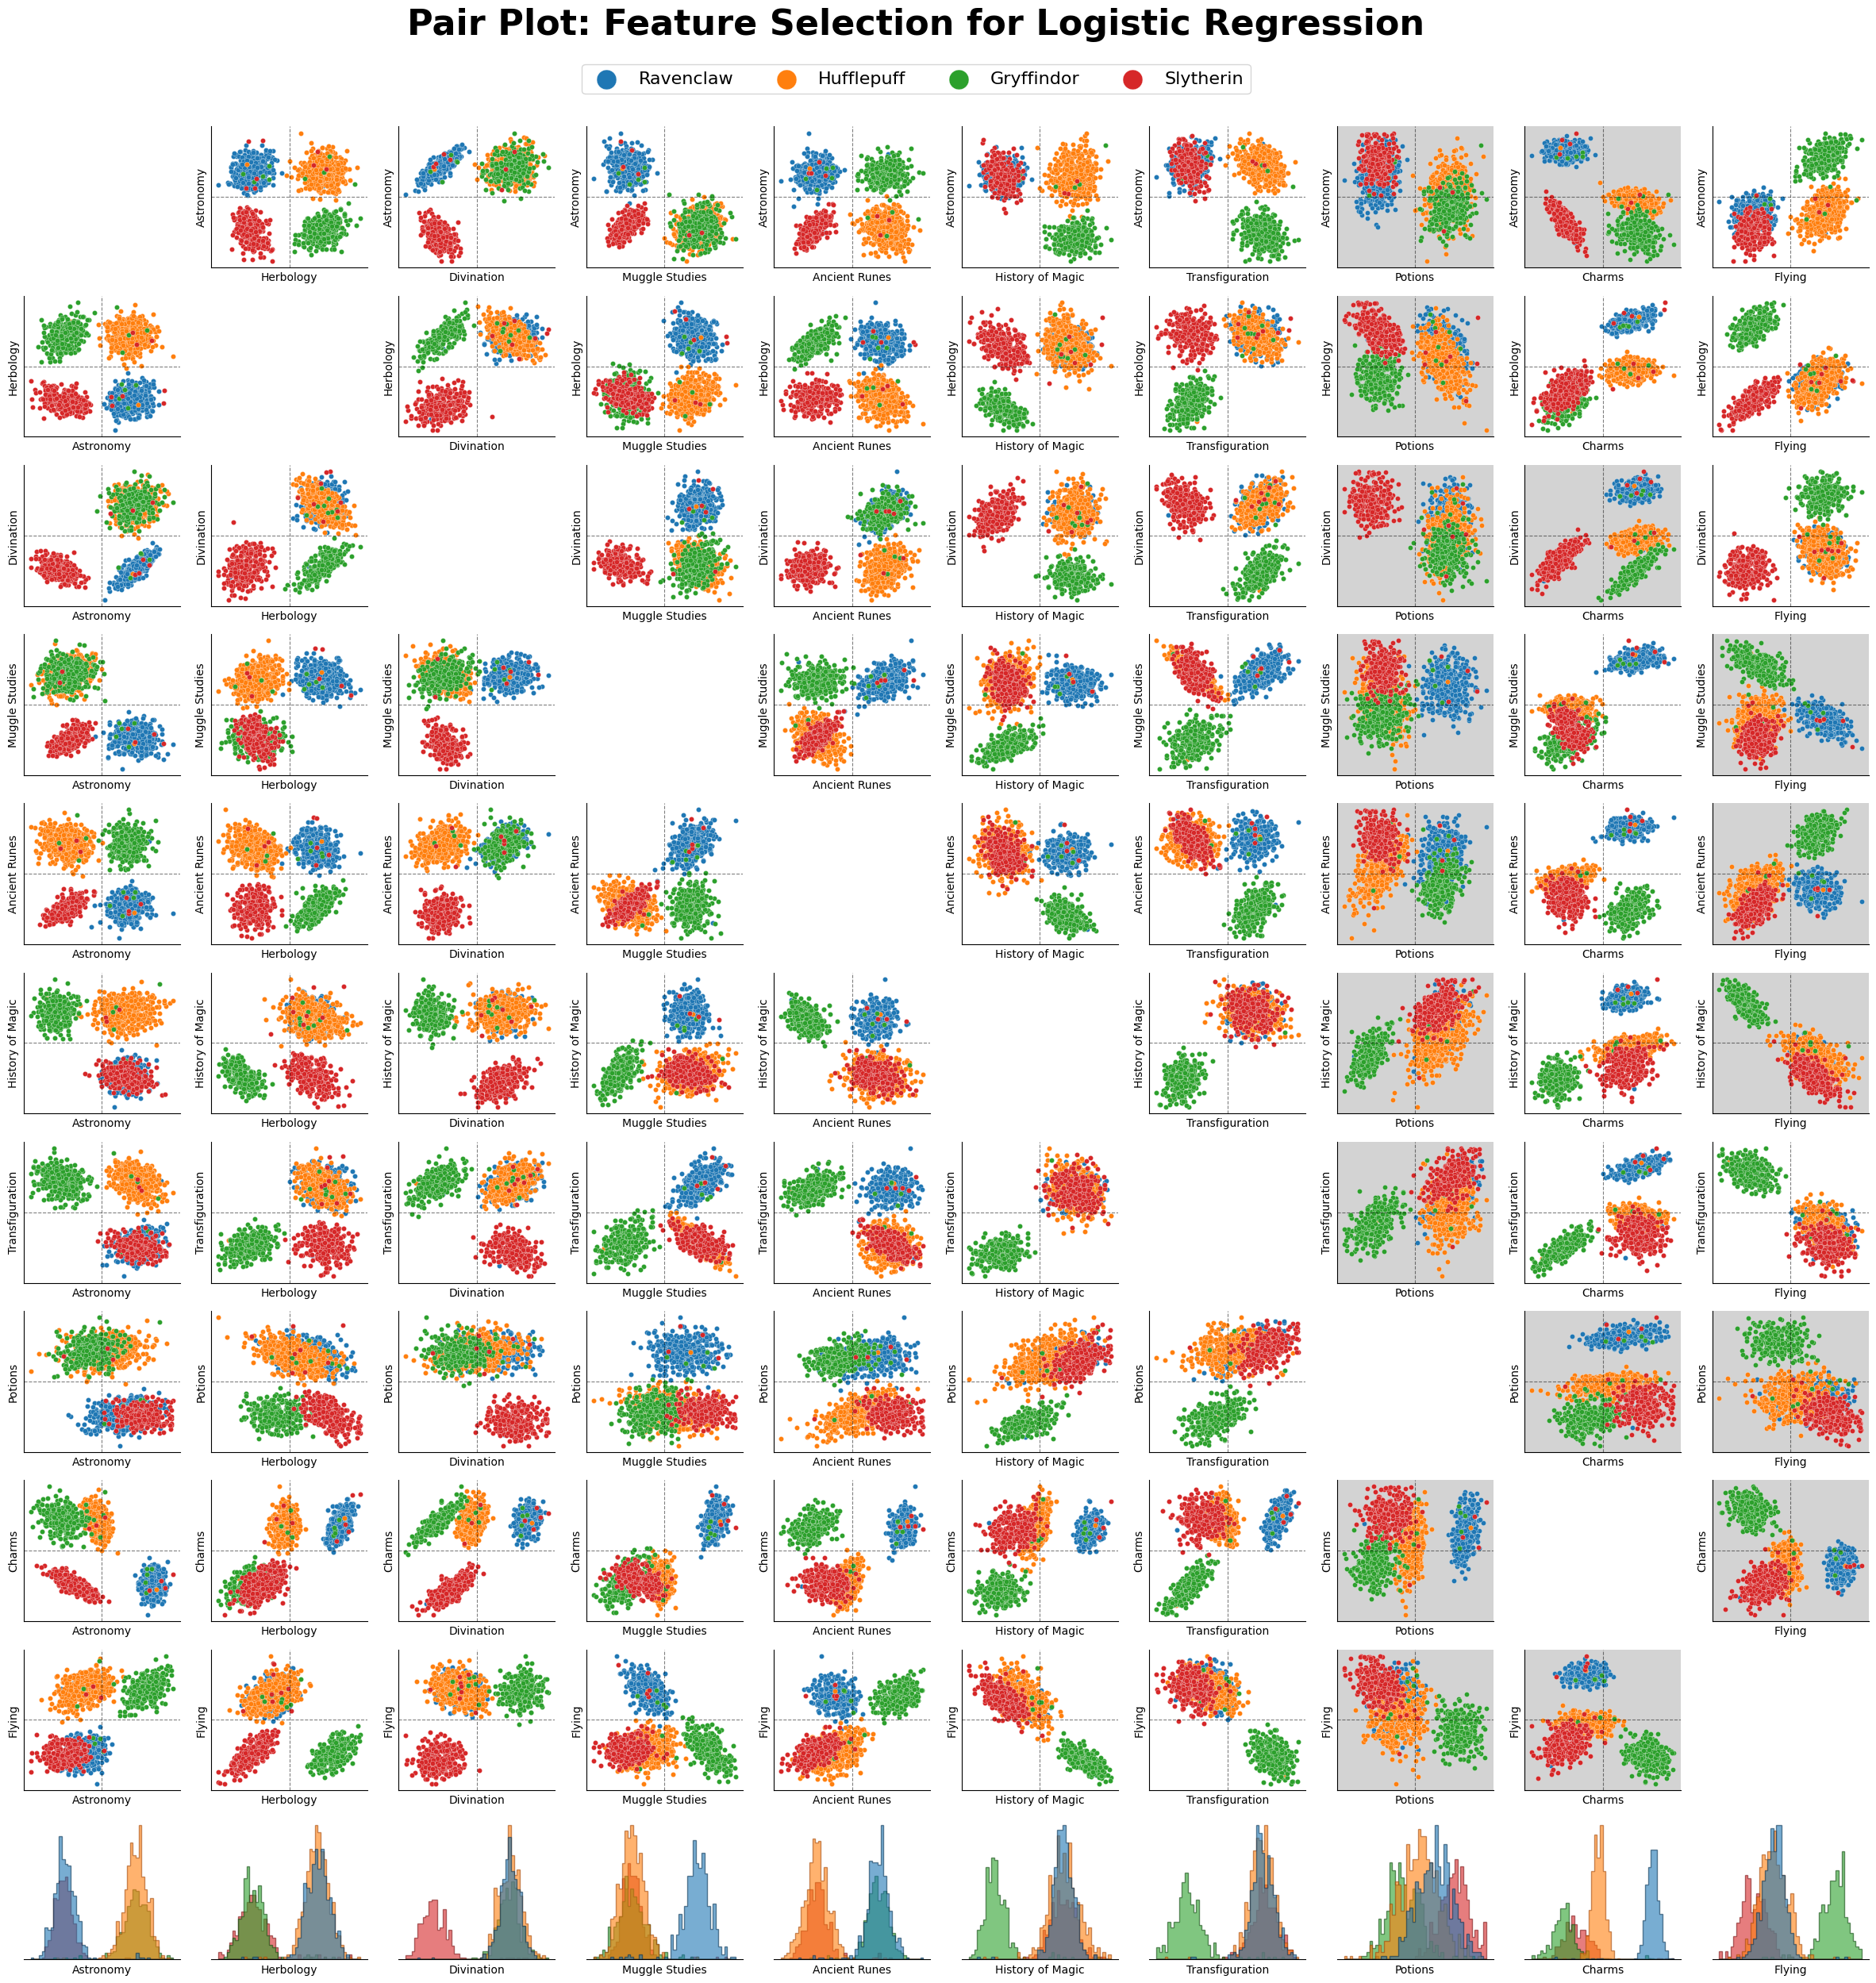

In [121]:
fig, ax = plt.subplots(11, 10, figsize=(30, 30))

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


for i in range(10):
    for j in range(10):
        if (i == j): 
            fig.delaxes(ax[i, j])
            continue

        for id, h in enumerate(houses):
            x = np.array(data[data["Hogwarts House"] == h][courses[i]])
            y = np.array(data[data["Hogwarts House"] == h][courses[j]])
            
            ax[i, j].scatter(x, y,
                s=20,
                c=color[id],
                edgecolor="white",
                linewidths=0.2,
                label=h
                )
            
            ax[i, j].set_xlabel(courses[j])
            ax[i, j].set_ylabel(courses[i])
        

       # Get axis limits (returns tuples)
        xlim = ax[i, j].get_xlim()
        ylim = ax[i, j].get_ylim()

        # Calculate midpoints
        x_mid = (xlim[0] + xlim[1]) / 2
        y_mid = (ylim[0] + ylim[1]) / 2

        # Add quadrant lines at midpoints
        ax[i, j].axhline(y=y_mid, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
        ax[i, j].axvline(x=x_mid, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

        # Remove ticks & spline
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)
        
for i, c in enumerate(courses):
    plot = []
    for h in houses:
        plot.append(data[data["Hogwarts House"] == h][c])

    ax[10, i].hist(plot,
        bins=50, histtype='stepfilled', linewidth=1,
        color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
        edgecolor= ['#073354', '#a44807', '#0f490f', '#7a1414'],
        label = houses,
        alpha=0.6)

    ax[10, i].spines['top'].set_visible(False)
    ax[10, i].spines['right'].set_visible(False)
    ax[10, i].spines['left'].set_visible(False)
    ax[10, i].set_xlabel(c, fontsize=10)
    ax[10, i].set_xticks([])
    ax[10, i].set_yticks([])

handles, labels = ax[0, 1].get_legend_handles_labels()

fig.legend(handles, labels, loc='upper center', 
           bbox_to_anchor=(0.5, 0.91), 
           fontsize=16, ncol=4, markerscale=4)

fig.suptitle('Pair Plot: Feature Selection for Logistic Regression', 
             fontsize=32, fontweight='bold', y=0.93)


ax[0,7].patch.set_facecolor('lightgray')
ax[1,7].patch.set_facecolor('lightgray')
ax[2,7].patch.set_facecolor('lightgray')
ax[3,7].patch.set_facecolor('lightgray')
ax[4,7].patch.set_facecolor('lightgray')
ax[5,7].patch.set_facecolor('lightgray')
ax[6,7].patch.set_facecolor('lightgray')
ax[8,7].patch.set_facecolor('lightgray')
ax[9,7].patch.set_facecolor('lightgray')

ax[0,8].patch.set_facecolor('lightgray')
ax[2,8].patch.set_facecolor('lightgray')
ax[7,8].patch.set_facecolor('lightgray')
ax[9,8].patch.set_facecolor('lightgray')

ax[8,9].patch.set_facecolor('lightgray')
ax[7,9].patch.set_facecolor('lightgray')
ax[5,9].patch.set_facecolor('lightgray')
ax[4,9].patch.set_facecolor('lightgray')
ax[3,9].patch.set_facecolor('lightgray')



Feature selection:

Criteria:
- Show good separation between houses (different colors form distinct clusters)
- Have low correlation with each other (avoid redundant information)

We already know - Care of Magical Creatures | Arithmancy | Defense Against the Dark Arts
Does fit this criterias, remove those find and create plot pair matrix

Analyzed these houses don't form distinct clusters - Potions | Charms | Flying
Remove these as well:

Only left (asnwer):
- Astronomy | Herbology | Divination | Muggle Studies | Ancient Runes | History of Magic | Transfiguration

In [122]:
data.drop(columns=["Potions", "Charms", "Flying"], inplace=True)

courses = data.columns[6:]
print(courses, len(courses))


Index(['Astronomy', 'Herbology', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration'],
      dtype='object') 7


Text(0.5, 0.93, 'Pair Plot: Feature Selection for Logistic Regression')

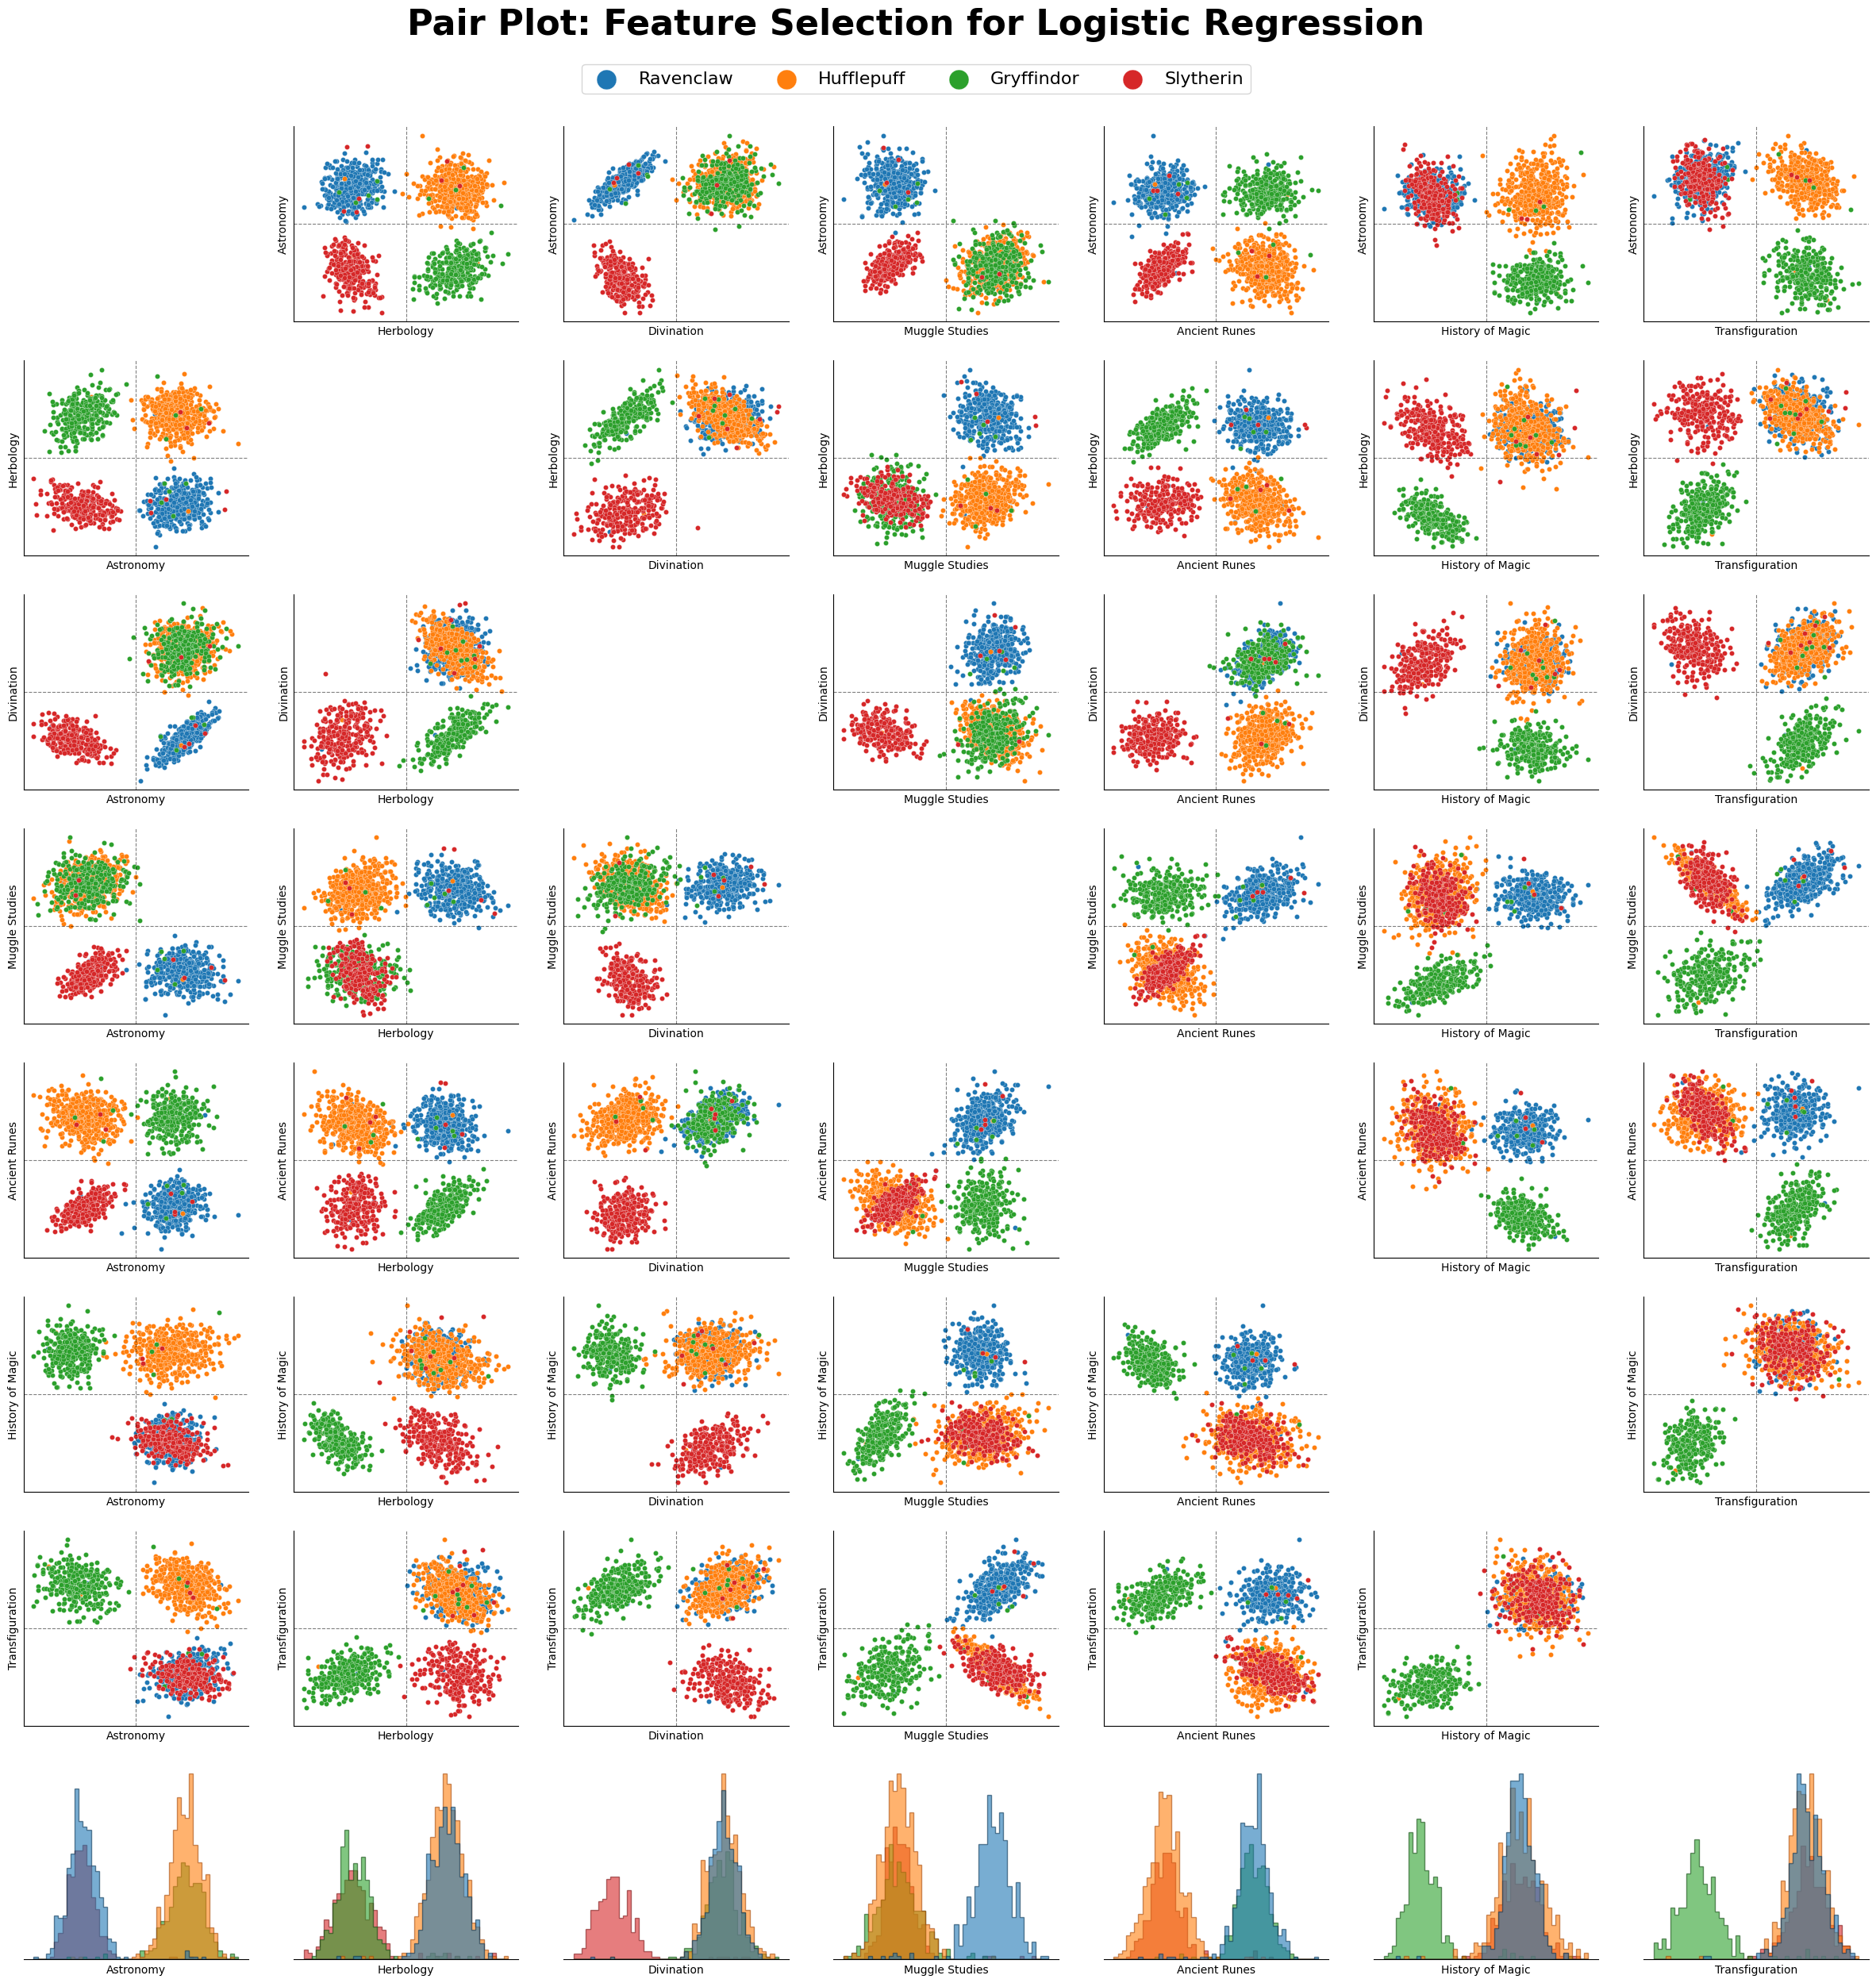

In [123]:
fig, ax = plt.subplots(8, 7, figsize=(30, 30))

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


for i in range(7):
    for j in range(7):
        if (i == j): 
            fig.delaxes(ax[i, j])
            continue

        for id, h in enumerate(houses):
            x = np.array(data[data["Hogwarts House"] == h][courses[i]])
            y = np.array(data[data["Hogwarts House"] == h][courses[j]])
            
            ax[i, j].scatter(x, y,
                s=20,
                c=color[id],
                edgecolor="white",
                linewidths=0.2,
                label=h
                )
            
            ax[i, j].set_xlabel(courses[j])
            ax[i, j].set_ylabel(courses[i])

        # Get axis limits (returns tuples)
        xlim = ax[i, j].get_xlim()
        ylim = ax[i, j].get_ylim()

        # Calculate midpoints
        x_mid = (xlim[0] + xlim[1]) / 2
        y_mid = (ylim[0] + ylim[1]) / 2

        # Add quadrant lines at midpoints
        ax[i, j].axhline(y=y_mid, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
        ax[i, j].axvline(x=x_mid, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

        # Remove ticks & spline
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)
        
for i, c in enumerate(courses):
    plot = []
    for h in houses:
        plot.append(data[data["Hogwarts House"] == h][c])

    ax[7, i].hist(plot,
        bins=50, histtype='stepfilled', linewidth=1,
        color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
        edgecolor= ['#073354', '#a44807', '#0f490f', '#7a1414'],
        label = houses,
        alpha=0.6)

    ax[7, i].spines['top'].set_visible(False)
    ax[7, i].spines['right'].set_visible(False)
    ax[7, i].spines['left'].set_visible(False)
    ax[7, i].set_xlabel(c, fontsize=10)
    ax[7, i].set_xticks([])
    ax[7, i].set_yticks([])

handles, labels = ax[0, 1].get_legend_handles_labels()

fig.legend(handles, labels, loc='upper center', 
           bbox_to_anchor=(0.5, 0.91), 
           fontsize=16, ncol=4, markerscale=4)

fig.suptitle('Pair Plot: Feature Selection for Logistic Regression', 
             fontsize=32, fontweight='bold', y=0.93)
